In [1]:
%load_ext autotime
#General settings
import os #woking directory
import pandas as pd
import numpy as np


#Tokenization
#Caricare i pacchetti commentati solo la prima volta
##nltk.download('stopwords')
##nltk.download('wordnet')

import re
import nltk
from collections import Counter #Conteggio parole
from nltk.corpus import stopwords #Rimozione stopwords


#Wordcloud
import random
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud


directory = "C:/Users/prowm/OneDrive/Desktop/Data Science/Web Marketing"
os.chdir(directory)

In [3]:
text_list = []
file = open('ING direct.txt', 'r')
for line in file:
    if len(line) > 3:
        text_list.append(line.strip('\n'))

time: 18 ms


In [4]:
user_list = []
date_list = []
review_list = []

i = 0
while (i<len(text_list)-2):
    user_list.append(text_list[i])
    date_list.append(text_list[i+1])
    review_list.append(text_list[i+2])
    
    i = i+3

time: 9 ms


In [5]:
tokenst = [review_list[i].split() for i in range(len(review_list))]
tokens = []
di = {"l'app":'applicazione', 'crasha':'crash', 'aggiornamento,':'aggiornamento', 'carte':'carta', 
      "l'applicazione":'applicazione', 'prepagata.':'prepagata', "l'opzione":'opzione', 'funziona':'funzione', 
     'funzioni':'funziona', "l'accesso":'accesso', 'notifiche..':'notifiche', 'edit:':'edit', 'crash,':'crash', 
     'corrente.':'corrente', 'prepagate.':'prepagata', "all'apertura":'apertura', 'seria?':'seria', 'token,':'token', 
     'dev,':'deve', 'digitale...':'digitale', 'app.':'applicazione', 'bene,':'bene', "dell'app":'applicazione', 
     'corrente,':'corrente', 'seria!?!':'seria', "all'apertura,":'apertura', 'smartphone,':'smartphone', 
      'prepagata!':'prepagata'}

for lista in tokenst:
    for parola in lista:
        if parola in di.keys():
            parola = di[parola]
        tokens.append(parola)

time: 21.1 ms


In [2]:
di = {"l'app":'applicazione', 'crasha':'crash', 'aggiornamento,':'aggiornamento', 'carte':'carta', 
      "l'applicazione":'applicazione', 'prepagata.':'prepagata', "l'opzione":'opzione', 'funziona':'funzione', 
     'funzioni':'funziona', "l'accesso":'accesso', 'notifiche..':'notifiche', 'edit:':'edit', 'crash,':'crash', 
     'corrente.':'corrente', 'prepagate.':'prepagata', "all'apertura":'apertura', 'seria?':'seria', 'token,':'token', 
     'dev,':'deve', 'digitale...':'digitale', 'app.':'applicazione', 'bene,':'bene', "dell'app":'applicazione', 
     'corrente,':'corrente', 'seria!?!':'seria', "all'apertura,":'apertura', 'smartphone,':'smartphone', 
      'prepagata!':'prepagata'}
lemmatizer = nltk.stem.WordNetLemmatizer()

time: 68.2 ms


In [6]:
lemmatizer = nltk.stem.WordNetLemmatizer()

words = []
#positive
for word in tokens:
    word = lemmatizer.lemmatize(word.lower())
    if len(word)>3:
        if '.' not in word:
            if '!' not in word:
                if ',' not in word:
                    words.append(word)

time: 2.15 s


In [20]:
tokens2 = Counter(words).most_common(500)
tokens2
stop = ['anche', 'quando', 'dopo', 'sono', 'della', 'perché', "l'app", "l'applicazione", 'fare', 'alla', "l'ultimo", 
       'come', 'sarebbe', 'molto', 'solo', 'delle', 'tramite', 'grazie', 'ancora', 'posso', "l'opzione", 'questo',
       'subito', 'poter', 'volta', 'possibilità', 'sarà', 'cosa', 'grazie.', 'appena', 'tutte', 'prima', 'sempre', 
       'senza', 'questa', 'però', 'loro', 'serve', 'chiedo', 'favore', "l'aggiornamento", 'devo', 'crash.', 
       'fosse', 'ogni', 'tutto', 'bisogno', 'essere', 'ma...', 'abbastanza', "l'inserimento", 'mesi', "l'ho", 'out.', 
       "c'era", '6.11.10', 'seria?', 'mi2s', "all'applicazione", "piu'", "nella", "ciao", "edit:", "trading?", "nell"]

time: 7.02 ms


In [10]:
stop = ['anche', 'quando', 'dopo', 'sono', 'della', 'perché', "l'app", "l'applicazione", 'fare', 'alla', "l'ultimo", 
       'come', 'sarebbe', 'molto', 'solo', 'delle', 'tramite', 'grazie', 'ancora', 'posso', "l'opzione", 'questo',
       'subito', 'poter', 'volta', 'possibilità', 'sarà', 'cosa', 'grazie.', 'appena', 'tutte', 'prima', 'sempre', 
       'senza', 'questa', 'però', 'loro', 'serve', 'chiedo', 'favore', "l'aggiornamento", 'devo', 'crash.', 
       'fosse', 'ogni', 'tutto', 'bisogno', 'essere', 'ma...', 'abbastanza', "l'inserimento", 'mesi', "l'ho", 'out.', 
       "c'era", '6.11.10', 'seria?', 'mi2s', "all'applicazione", "piu'", "nella", "ciao", "edit:", "trading?", "nell", 
       "dell'app?", "applicazione:"]

time: 5.01 ms


In [75]:
from collections import Counter
Counter(diz_word).most_common(500)

[('carta', 35),
 ('applicazione', 22),
 ('ottima', 22),
 ('funzione', 21),
 ('prepagata', 21),
 ('aggiornamento', 20),
 ('xiaomi', 13),
 ('codice', 13),
 ('token', 13),
 ('crash', 12),
 ('gestire', 11),
 ('sezione', 10),
 ('conto', 10),
 ('banca', 8),
 ('versione', 8),
 ('gestione', 8),
 ('manca', 8),
 ('vedere', 7),
 ('utile', 7),
 ('opzione', 6),
 ('qualche', 6),
 ('accedere', 6),
 ('trading', 6),
 ('possibile', 6),
 ('finalmente', 6),
 ('interfaccia', 6),
 ('corrente', 5),
 ('funziona', 5),
 ('continuum', 5),
 ('problema', 5),
 ('movimenti', 5),
 ('sito', 5),
 ('login', 4),
 ('risolto', 4),
 ('operazione', 4),
 ('funzionalità', 4),
 ('perfetta', 4),
 ('stelle', 4),
 ('arancio', 4),
 ('richiesta', 4),
 ('resto', 4),
 ('quanto', 4),
 ('bene', 4),
 ('prepagate', 4),
 ('completa', 4),
 ('buona', 4),
 ('effettuare', 3),
 ('credito', 3),
 ('aggiungete', 3),
 ('risolvete', 3),
 ('aggiornata', 3),
 ('accesso', 3),
 ('avvia', 3),
 ('avete', 3),
 ('android', 3),
 ('parte', 3),
 ('operazioni',

time: 24.1 ms


In [ ]:
i = 0
diz_word = {}
while i<len(tokens2):
    temp = tokens2[i][0]
    if temp not in stop:
        diz_word[temp] = tokens2[i][1]
    i = i+1
    

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=alice_mask, 
                      font_step=3, colormap=cmap, random_state=1)
wordcloud.generate_from_frequencies(frequencies=diz_word)
plt.figure(figsize=(25,15))
plt.title("WordCloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
# Read the whole text.
#directory = "C:/Users/prowm/OneDrive/Desktop"
#os.chdir(directory)
alice_mask = np.array(Image.open("like.png"))

time: 59.2 ms


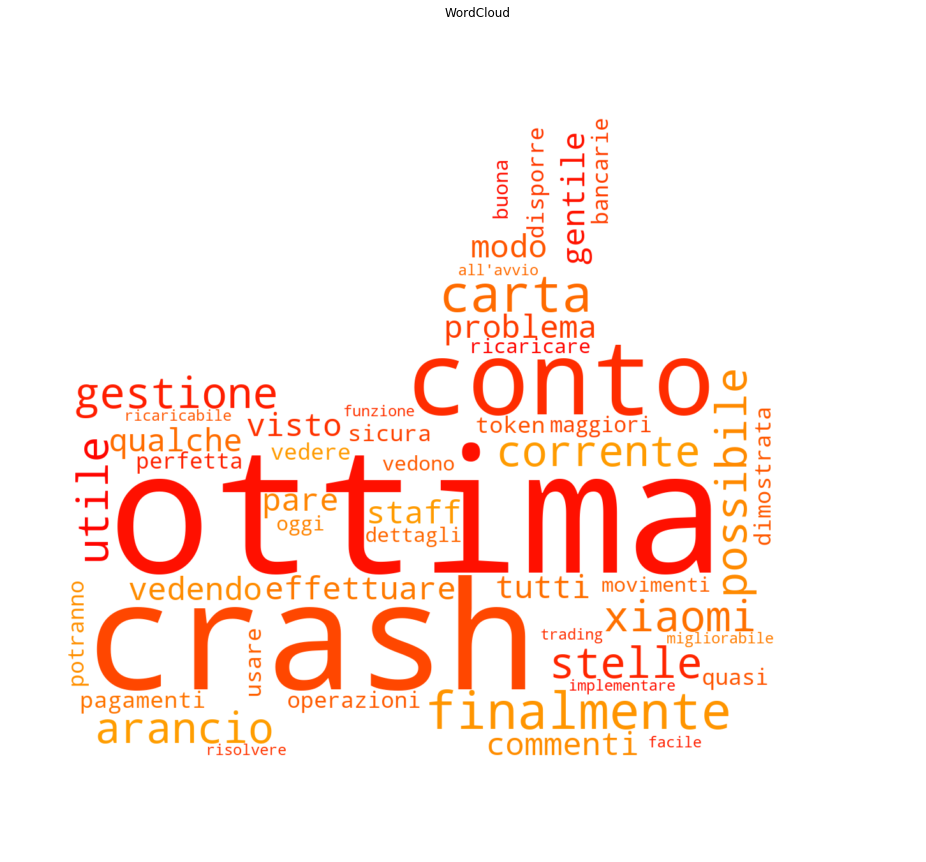

time: 2.72 s


In [12]:
text_list = []
file = open('pos.txt', 'r')
for line in file:
    if len(line) > 3:
        text_list.append(line.strip('\n'))
        
user_list = []
date_list = []
review_list = []

i = 0
while (i<len(text_list)-2):
    user_list.append(text_list[i])
    date_list.append(text_list[i+1])
    review_list.append(text_list[i+2])  
    i = i+3
    
tokenst = [review_list[i].split() for i in range(len(review_list))]
tokens = []
for lista in tokenst:
    for parola in lista:
        if parola in di.keys():
            parola = di[parola]
        tokens.append(parola)
        

words = []
for word in tokens:
    word = lemmatizer.lemmatize(word.lower())
    if len(word)>3:
        if '.' not in word:
            if '!' not in word:
                if ',' not in word:
                    words.append(word)

tokens2 = Counter(words).most_common(500)
tokens2                 
                    
i = 0
diz_word = {}
while i<len(tokens2):
    temp = tokens2[i][0]
    if temp not in stop:
        diz_word[temp] = tokens2[i][1]
    i = i+1
    

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=alice_mask, stopwords=stop,
                      font_step=1, colormap=cmap, random_state=1)
wordcloud.generate_from_frequencies(frequencies=diz_word)
plt.figure(figsize=(25,15))
plt.title("WordCloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
tokens2

[('ottima', 4),
 ('crash', 3),
 ('conto', 3),
 ('finalmente', 3),
 ('carta', 3),
 ('xiaomi', 2),
 ('grazie', 2),
 ('molto', 2),
 ('utile', 2),
 ('corrente', 2),
 ('stelle', 2),
 ('arancio', 2),
 ('possibile', 2),
 ('gestione', 2),
 ('gentile', 1),
 ('staff', 1),
 ('visto', 1),
 ('vedendo', 1),
 ('commenti', 1),
 ('pare', 1),
 ('questo', 1),
 ('problema', 1),
 ('tutti', 1),
 ('qualche', 1),
 ('modo', 1),
 ('effettuare', 1),
 ('pagamenti', 1),
 ('senza', 1),
 ('usare', 1),
 ('token', 1),
 ("dell'app?", 1),
 ("l'applicazione", 1),
 ('dimostrata', 1),
 ('sicura', 1),
 ('disporre', 1),
 ('operazioni', 1),
 ('bancarie', 1),
 ('quasi', 1),
 ('perfetta', 1),
 ('quando', 1),
 ('potranno', 1),
 ('vedere', 1),
 ('maggiori', 1),
 ('dettagli', 1),
 ('movimenti', 1),
 ('come', 1),
 ('vedono', 1),
 ('oggi', 1),
 ('ricaricare', 1),
 ('buona', 1),
 ('migliorabile', 1),
 ('implementare', 1),
 ('trading', 1),
 ('della', 1),
 ('ricaricabile', 1),
 ("all'avvio", 1),
 ('appena', 1),
 ('risolvere', 1),
 ('pr

time: 7.02 ms
